# Titanic

Le RMS Titanic est un paquebot transatlantique britannique qui fait naufrage dans l'océan Atlantique Nord en 1912 à la suite d'une collision avec un iceberg, lors de son voyage inaugural de Southampton à New York. Entre 1 490 et 1 520 personnes trouvent la mort, ce qui fait de cet événement l'une des plus grandes catastrophes maritimes survenues en temps de paix et la plus grande pour l'époque.
- [source wikipedia](https://fr.wikipedia.org/wiki/Titanic)

Le jeu de données (ou dataset) du Titanic est un peu le hello world pour l'apprentissage supervisé, le but est de trouver si les personnes présentent dans le fichier de données non-labellisées (test_data.csv) auraient survécu ou non lors du nauvrage de "l'insubmersible".
Le résultat étant représenté par une donnée discrète (Survie ou non), nous allons utiliser un algorithme de classification :
- L'arbre décisionnel (Decision Tree)
- Forêt d'arbres décisionnels (Random Forest)
- Régression Logistique (Logistic Regression)

Il n'y pas de méthodes meilleure qu'une autre, disons plutôt qu'il y en a une plus adaptée qu'une autre.

# L'arbre décisionnel (Decision Tree)

Le principe de l'arbre de décision est très simple : on parcourt un ensemble de décisions et on parcourt l'arbre jusqu'à arriver à la solution.
![schéma arbre décisionnel](../_images/decision-tree.png)
Voici un exemple d'arbre décisionnel concernant le jeu de données du Titanic. Vous remarquerez qu'un arbre de décision est très facile à lire, même sans avoir de connaissances en informatique / mathématiques.

Grâce à l'algorithme d'arbre décisionnel, nous n'avons qu'à désigner les caractéristiques qui vont servir à prendre les décisions, le nombre de noeuds ("questions"), et le reste sera fait tout seul. L'algorithme cherchant à trouver les questions les plus pertinentes, pour arriver à la réponse finale, dans notre cas il s'agit de la survie d'un passager du Titanic. 

Le problème de cette méthode, c'est quelle est très instable concernant les résultats, étant donné qu'il n'y a qu'un seul et unique test, un arbre parcouru autrement dit, notre modèle peut être fortement soumis au surapprentissage (overfitting). Ce qui fait que lors de la phase de test sur données non-labellisées, le résultat sera aléatoire. Et en ML, on essaye le plus possible de limiter la variance des résultats. C'est là qu'entre en jeu l'algorithme de forêt d'arbre décisionnels (Random Forest).

# Forêt d'arbres décisionnels (Random Forest)

L'algorithme de forêt d'arbres décisionnels reprend le même principe que l'algorithme d'arbre décisionnel à la différence prêt que la forêt d'arbres décisionnels va multiplier le nombre d'arbres, ceci limite donc les risques de surapprentissage. On en déduit donc que plus il y a d'arbres dans notre forêt, moins notre modèle sera soumis au surentraînement. Néanmoins, effectuer un million d'arbres n'a pas vraiment d'intérêt.

# Pour les utilisateurs de Google colab

Petit apparté pour les utilisateurs de google colab. Pour utiliser la méthode `pd.read_csv()`, il faudra rajouter quelques lignes de codes supplémentaires pour pouvoir charger un fichier, les voici.


```python
# Première cellule jupyter
from google.colab import files
uploaded = files.upload()
```

```python
# Seconde cellule jupyter
import io
# Très important : le nom du fichier passé en paramètre de la fonction "uploaded" doit avoir le même nom que le fichier que vous avez uploadé
df = pd.read_csv(io.BytesIO(uploaded['nom-du-fichier-uploader.csv']))
```

- [Voir plus  d'informations sur le chargement de fichiers externes avec Google colab](https://towardsdatascience.com/3-ways-to-load-csv-files-into-colab-7c14fcbdcb92)

# Charger des fichiers distants (depuis un serveur)

La classe `request` de Python permet d'effectuer des requêtes serveur, on peut l'utiliser de la façon suivante pour charger un fichier distant.

```python
request.urlretrieve ("lien-du-fichier", "reference-locale-du-fichier")
df = pd.read_csv("reference-locale-du-fichier")
```

In [ ]:
PassengerId : Identifiant unique du passager
Survived : 0 = Décès, 1 = En vie
Pclass : La classe de voyage (1 = 1ere classe, 2 = 2ème classe, 3 = 3ème classe)
Name : Le nom du passager
Sex : Le sexe du passager
Age : L’age du passager
SibSp : Le nombre de frères et soeurs ou époux / épouses à bord
Parch : Le nombre de parents ou enfants à bord
Ticket : Le numéro du billet de voyage
Fare : Le prix du billet de voyage
Cabin : Le numéro de la cabine
Embarked : Lieu d’embarquement du passager (C = Cherbourg, S = Southampton, Q = Queenstown)

array([15, 20, 60])

array([[15],
       [20],
       [60]])

[454.15844092]
-40.78364909586048


numpy.ndarray

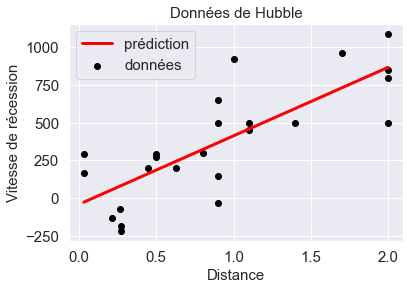

array([[0.032],
       [1.5  ],
       [2.   ],
       [0.6  ]])

array([-26.25057899, 640.45401229, 867.53323275, 231.71141546])

,Actual,Predicted
0,0.032,-26.250579
1,1.500,640.454012
2,2.000,867.533233
3,0.600,231.711415


In [28]:
from urllib import request
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()


request.urlretrieve ("https://s3-eu-west-1.amazonaws.com/static.oc-static.com/prod/courses/files/Parcours_data_scientist/decouvrez-les-librairies-python-pour-la-data-science/hubble_data.csv", "be.csv")
hubble = pd.read_csv("ble.csv")

from sklearn.linear_model import LinearRegression

X = hubble.distance.values.reshape(-1,1)
Y = hubble.recession_velocity
lr = LinearRegression()
lr.fit(X, Y)

Y_test = np.array([.032, 1.5, 2.0, .6]).reshape(-1, 1)
y_predict = lr.predict(Y_test)

display(np.array([15, 20, 60]))
display(np.array([15, 20, 60]).reshape(-1, 1))

print(lr.coef_) # a de ax + b
print(lr.intercept_) # b de ax +b 

display(type(Y_test))
LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)



BIGGER_SIZE = 15
plt.rc('font', size=BIGGER_SIZE) # taille de texte par défaut
plt.rc('axes', titlesize=BIGGER_SIZE) # taille des titres des axes
plt.rc('axes', labelsize=BIGGER_SIZE) # taille des labels des axes
plt.rc('xtick', labelsize=BIGGER_SIZE) # taille des ticks des ascisses

plt.rc('ytick', labelsize=BIGGER_SIZE) # taille des ticks des ordonnées
plt.rc('legend', fontsize=BIGGER_SIZE) # taille de la légende
plt.rc('figure', titlesize=BIGGER_SIZE) # taille du titre
plt.figure()
plt.title("Données de Hubble")
plt.scatter(X, Y, color='black', label="données")
plt.plot(X, lr.predict(X), color='red', linewidth=3, label="prédiction")
plt.xlabel("Distance")
plt.ylabel("Vitesse de récession")
plt.legend()
plt.show()

display(Y_test)
display(y_predict)
df = pd.DataFrame({'Actual': Y_test.flatten(), 'Predicted': y_predict})
df

#pd.DataFrame({
 #   "Feature":hubble.columns.tolist(), "Coefficients" :lr.coef_[0]
#})
